I give a try to create a SQLite database from [Recruit Restaurant Visitor Forecasting](https://www.kaggle.com/c/recruit-restaurant-visitor-forecasting/data) and manipulate data wrangling tasks:


In [1]:
# import environment
import seaborn as sns

# Create a new SQLite database

SQLite automatically creates a database if the file does not exist. I create a database file and name it ___visitor_forecasting.db:___

In [2]:
import sqlite3
con = sqlite3.connect('visitor_forecasting.db')  # create a database connection
cur = con.cursor()  # create a cursor

Load CSV data into a sqlite table using __pandas__:

In [3]:
import pandas as pd
air_store_info = pd.read_csv('../input/recruit-restaurant-visitor-forecasting-data/air_store_info.csv')  # load the data into Pandas 
air_store_info.to_sql('air_store_info', con, if_exists='replace', index = False)  # write to a sqlite database

air_reserve = pd.read_csv('../input/recruit-restaurant-visitor-forecasting-data/air_reserve.csv')
air_reserve.to_sql('air_reserve', con, if_exists='replace', index = False)

hpg_reserve = pd.read_csv('../input/recruit-restaurant-visitor-forecasting-data/hpg_reserve.csv')
hpg_reserve.to_sql('hpg_reserve', con, if_exists='replace', index = False)

In [4]:
pd.read_sql('''SELECT * FROM air_store_info''', con)

,air_store_id,air_genre_name,air_area_name,latitude,longitude
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197853
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197853
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197853
3,air_a17f0778617c76e2,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197853
4,air_83db5aff8f50478e,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
...,...,...,...,...,...
824,air_9bf595ef095572fb,International cuisine,Tōkyō-to Shibuya-ku Shibuya,35.661777,139.704051
825,air_764f71040a413d4d,Asian,Tōkyō-to Shibuya-ku Shibuya,35.661777,139.704051
826,air_10bbe8acd943d8f6,Asian,Tōkyō-to Shibuya-ku Shibuya,35.661777,139.704051
827,air_7514d90009613cd6,Karaoke/Party,Hokkaidō Sapporo-shi Minami 3 Jōnishi,43.055460,141.340956


In [5]:
pd.read_sql('''SELECT * FROM air_reserve''', con)

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5
...,...,...,...,...
92373,air_db4b38ebe7a7ceff,2017-05-29 18:00:00,2017-04-17 19:00:00,6
92374,air_1033310359ceeac1,2017-05-30 23:00:00,2017-04-19 17:00:00,8
92375,air_877f79706adbfb06,2017-05-31 20:00:00,2017-04-12 23:00:00,3
92376,air_900d755ebd2f7bbd,2017-05-31 20:00:00,2017-04-19 16:00:00,10


In [6]:
pd.read_sql('''SELECT * FROM hpg_reserve''', con)

,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,hpg_c63f6f42e088e50f,2016-01-01 11:00:00,2016-01-01 09:00:00,1
1,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3
2,hpg_c8e24dcf51ca1eb5,2016-01-01 16:00:00,2016-01-01 14:00:00,2
3,hpg_24bb207e5fd49d4a,2016-01-01 17:00:00,2016-01-01 11:00:00,5
4,hpg_25291c542ebb3bc2,2016-01-01 17:00:00,2016-01-01 03:00:00,13
...,...,...,...,...
2000315,hpg_2b293477ea4642fb,2017-05-31 20:00:00,2017-04-19 07:00:00,2
2000316,hpg_f922aeca48ca5a29,2017-05-31 20:00:00,2017-03-19 00:00:00,3
2000317,hpg_e9151de687b93aa3,2017-05-31 21:00:00,2017-04-14 20:00:00,49
2000318,hpg_fae6c96189b4a122,2017-05-31 21:00:00,2017-04-19 17:00:00,9


# Handling missing data

In [7]:
# how many missing values per column
missing_values_count = air_store_info.isnull().sum()
print('The number of missing values per column in air_store_info:\n', missing_values_count)

The number of missing values per column in air_store_info:
 air_store_id      0
air_genre_name    0
air_area_name     0
latitude          0
longitude         0
dtype: int64


In [8]:
# how many missing values per column
missing_values_count = air_reserve.isnull().sum()
print('The number of missing values per column in air_reserve:\n', missing_values_count)

The number of missing values per column in air_reserve:
 air_store_id        0
visit_datetime      0
reserve_datetime    0
reserve_visitors    0
dtype: int64


In [9]:
# how many missing values per column
missing_values_count = hpg_reserve.isnull().sum()
print('The number of missing values per column in hpg_reserve:\n', missing_values_count)

The number of missing values per column in hpg_reserve:
 hpg_store_id        0
visit_datetime      0
reserve_datetime    0
reserve_visitors    0
dtype: int64


# Checking data type for each column

In [10]:
air_reserve.head()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5


In [11]:
air_reserve.dtypes

air_store_id        object
visit_datetime      object
reserve_datetime    object
reserve_visitors     int64
dtype: object

In [12]:
hpg_reserve.head()

,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,hpg_c63f6f42e088e50f,2016-01-01 11:00:00,2016-01-01 09:00:00,1
1,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3
2,hpg_c8e24dcf51ca1eb5,2016-01-01 16:00:00,2016-01-01 14:00:00,2
3,hpg_24bb207e5fd49d4a,2016-01-01 17:00:00,2016-01-01 11:00:00,5
4,hpg_25291c542ebb3bc2,2016-01-01 17:00:00,2016-01-01 03:00:00,13


In [13]:
hpg_reserve.dtypes

hpg_store_id        object
visit_datetime      object
reserve_datetime    object
reserve_visitors     int64
dtype: object

In [14]:
air_store_info.head()

,air_store_id,air_genre_name,air_area_name,latitude,longitude
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197853
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197853
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197853
3,air_a17f0778617c76e2,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197853
4,air_83db5aff8f50478e,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599


In [15]:
air_store_info.dtypes

air_store_id       object
air_genre_name     object
air_area_name      object
latitude          float64
longitude         float64
dtype: object

# Parsing dates

The [data type of datetime](http://docs.scipy.org/doc/numpy-1.12.0/reference/generated/numpy.dtype.kind.html#numpy.dtype.kind) in air_reserve and hpg_reserve columns is not M. The datetime format of air_reserve is '%Y/%m/%d %H/%M/%S'. I create a new column with the parsed datetime:

In [16]:
# create a new column (date_parsed) with the parsed dates
air_reserve['reserve_date_parsed'] = pd.to_datetime(air_reserve['reserve_datetime'], format="%Y-%m-%d %H:%M:%S")
air_reserve['visit_date_parsed'] = pd.to_datetime(air_reserve['visit_datetime'], format="%Y-%m-%d %H:%M:%S")
air_reserve['reserve_date_parsed'].dtypes
air_reserve['visit_date_parsed'].dtypes

dtype('<M8[ns]')

In [17]:
# create a new column (date_parsed) with the parsed dates
hpg_reserve['date_parsed'] = pd.to_datetime(air_reserve['visit_datetime'], format="%Y-%m-%d %H:%M:%S")
hpg_reserve['date_parsed'].dtypes

dtype('<M8[ns]')

<AxesSubplot:xlabel='reserve_date_parsed', ylabel='Count'>

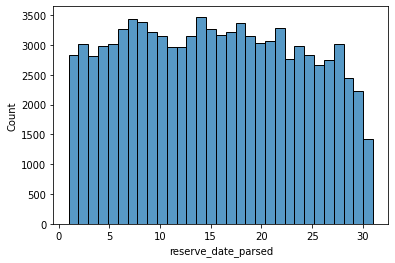

In [18]:
#check if parsing dates is working by writing the plot of day from 1 to 31
day_reserve = air_reserve['reserve_date_parsed'].dt.day
day_reserve.head()

#remove na's
day_reserve = day_reserve.dropna()

#plot the day of the month
#sns.histplot(day_of_month_landslides, kde=False, bins=31)
sns.histplot(day_reserve, bins=31)

<AxesSubplot:xlabel='visit_date_parsed', ylabel='Count'>

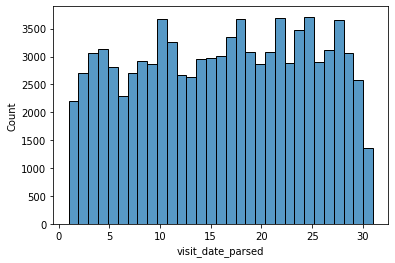

In [19]:
#check if parsing dates is working by writing the plot of day from 1 to 31
day_visit = air_reserve['visit_date_parsed'].dt.day
day_visit.head()

#remove na's
day_visit = day_visit.dropna()

#plot the day of the month
sns.histplot(day_visit, bins=31)

<AxesSubplot:xlabel='date_parsed', ylabel='Count'>

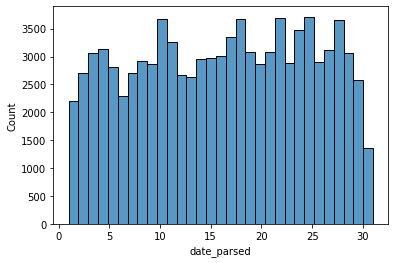

In [20]:
#check if parsing dates is working by writing the plot of day from 1 to 31
day_hpg = hpg_reserve['date_parsed'].dt.day
day_hpg.head()

#remove na's
day_hpg = day_hpg.dropna()

#plot the day of the month
sns.histplot(day_hpg, bins=31)

# Inconsistent data entry

In [21]:
# get all the unique values in the 'air_genre_name' column
genre_name = air_store_info['air_genre_name'].unique()
genre_name

array(['Italian/French', 'Dining bar', 'Yakiniku/Korean food',
       'Cafe/Sweets', 'Izakaya', 'Okonomiyaki/Monja/Teppanyaki',
       'Bar/Cocktail', 'Japanese food', 'Creative cuisine', 'Other',
       'Western food', 'International cuisine', 'Asian', 'Karaoke/Party'],
      dtype=object)

# Removing duplicates

In [22]:
# Count duplicate in a dataframe
air_store_info.duplicated().sum()

0

In [23]:
# Count duplicate in a dataframe
hpg_reserve.duplicated().sum()

16258

.loc takes a boolean and filter data based on True and False. The first argument .duplicated() will find the rows that were identified by duplicated(). The second argument : will display all columns.

In [24]:
# Extract duplicate rows
# .loc gets rows (and/or columns) with particular labels with keep='first'(default)
hpg_reserve.loc[hpg_reserve.duplicated(), :]

,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors,date_parsed
62,hpg_8623b83c6b3cdcb0,2016-01-01 18:00:00,2016-01-01 00:00:00,2,2016-01-04 19:00:00
235,hpg_4cf98a309253a9a8,2016-01-02 17:00:00,2016-01-01 16:00:00,4,2016-01-08 19:00:00
478,hpg_9525b1b2e0223c17,2016-01-02 18:00:00,2016-01-01 00:00:00,4,2016-01-10 19:00:00
700,hpg_7ed6d304949fc602,2016-01-02 19:00:00,2016-01-01 13:00:00,11,2016-01-14 17:00:00
911,hpg_f6117f6d2533237f,2016-01-03 01:00:00,2016-01-02 03:00:00,2,2016-01-16 18:00:00
...,...,...,...,...,...
2000122,hpg_66834c6410150f4a,2017-05-27 21:00:00,2017-04-19 16:00:00,2,NaT
2000137,hpg_e405e2f229393508,2017-05-27 22:00:00,2017-03-04 21:00:00,1,NaT
2000171,hpg_cf196e14931fe847,2017-05-28 13:00:00,2017-03-29 12:00:00,2,NaT
2000190,hpg_67864bf1e472830c,2017-05-28 17:00:00,2017-04-10 10:00:00,8,NaT


In [25]:
# Determine which duplicates to mark with keep='False'
hpg_reserve.loc[hpg_reserve.duplicated(keep='last'), :]

,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors,date_parsed
61,hpg_8623b83c6b3cdcb0,2016-01-01 18:00:00,2016-01-01 00:00:00,2,2016-01-04 19:00:00
234,hpg_4cf98a309253a9a8,2016-01-02 17:00:00,2016-01-01 16:00:00,4,2016-01-08 19:00:00
477,hpg_9525b1b2e0223c17,2016-01-02 18:00:00,2016-01-01 00:00:00,4,2016-01-10 19:00:00
699,hpg_7ed6d304949fc602,2016-01-02 19:00:00,2016-01-01 13:00:00,11,2016-01-14 17:00:00
910,hpg_f6117f6d2533237f,2016-01-03 01:00:00,2016-01-02 03:00:00,2,2016-01-16 18:00:00
...,...,...,...,...,...
2000121,hpg_66834c6410150f4a,2017-05-27 21:00:00,2017-04-19 16:00:00,2,NaT
2000135,hpg_e405e2f229393508,2017-05-27 22:00:00,2017-03-04 21:00:00,1,NaT
2000170,hpg_cf196e14931fe847,2017-05-28 13:00:00,2017-03-29 12:00:00,2,NaT
2000189,hpg_67864bf1e472830c,2017-05-28 17:00:00,2017-04-10 10:00:00,8,NaT


In [26]:
# Remove duplicates from the original dataframe
hpg_reserve.drop_duplicates(inplace=True)

# SQLite